In [1]:
import pandas_datareader as pdr
import matplotlib.ticker as ticker

import numpy
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import datetime
from mplfinance.original_flavor import candlestick2_ohlc

In [2]:
event = "kakao"
event_number = "035720"
start = datetime.datetime(2021,7,1)
end = datetime.datetime(2021,9,18)


In [3]:
table = pdr.naver.NaverDailyReader(event_number,start,end).read()
table.tail(10)

table = table.astype(int)
x_date = table.index.astype(str)

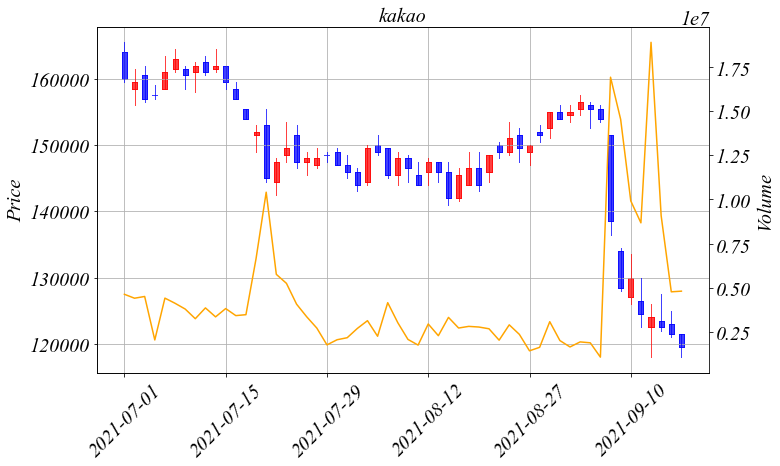

In [14]:
fig, ax = plt.subplots()



ax.plot(x_date,[numpy.nan for _ in range(len(x_date))])


candlestick2_ohlc(ax,table['Open'],table['High'],table['Low'],table['Close'],width=0.5,colorup='r',colordown='b')
plt.xticks(rotation=45)
plt.grid()





first_chart_color = 'black'
first_chart_xlabel_color = 'black'
first_chart_ylabel_color = 'black'


second_chart_color = 'orange'
second_chart_xlabel_color = 'black'
second_chart_ylabel_color = 'black'


ax2 = ax.twinx()
ax2.set_xscale('linear')

ax2.plot(x_date,table.Volume,color = second_chart_color)



ax.xaxis.set_major_locator(ticker.AutoLocator())

plt.title(event,fontsize=20)
ax.set_ylabel('Price',color = first_chart_xlabel_color)
ax2.set_ylabel('Volume',color = first_chart_ylabel_color)



fig.tight_layout()
fig.set_size_inches(15,10,forward=True)

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20 
plt.rcParams['font.style'] = 'oblique'


plt.show()



# 이평선

In [16]:
ma5 = table['Close'].rolling(window = 5).mean()
ma10 = table['Close'].rolling(window = 10).mean()
ma30 = table['Close'].rolling(window = 30).mean()

table.insert(len(table.columns),"MA5",ma5)
table.insert(len(table.columns),"MA10",ma10)
table.insert(len(table.columns),"MA30",ma30)


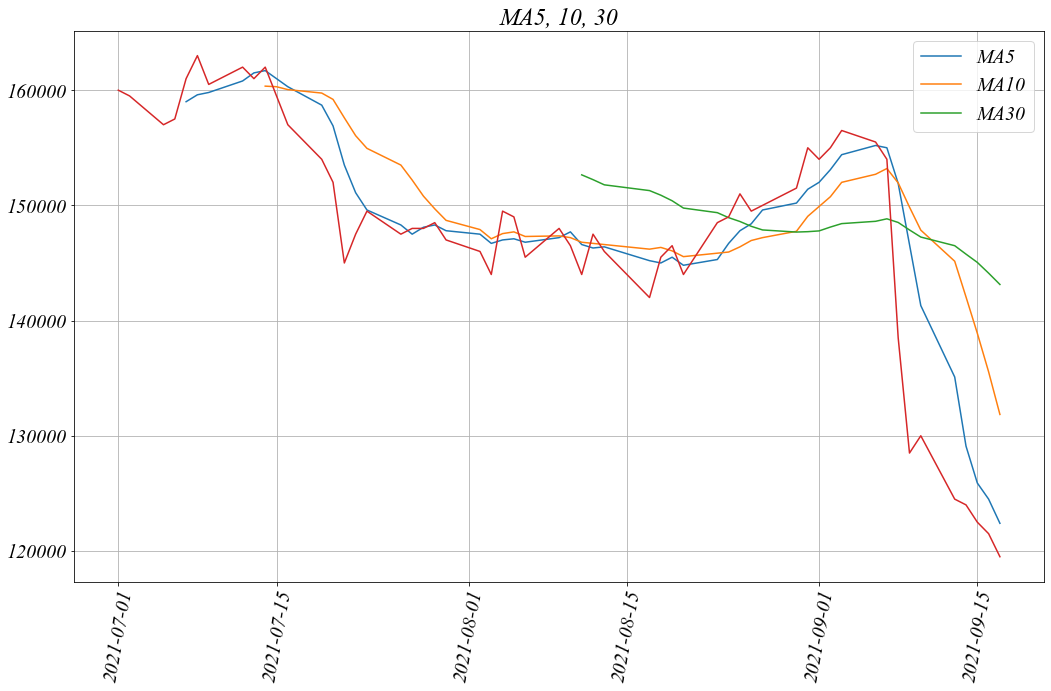

In [21]:
plt.figure(figsize=(15,10))
plt.plot(table[['MA5','MA10','MA30']],label=["MA5","MA10","MA30"])
plt.plot(table.index,table['Close'])
plt.legend(loc = 'best')
plt.xticks(rotation=80)
plt.title('MA5, 10, 30')

plt.tight_layout()


plt.grid()
plt.show()

In [18]:
# 추가 설명 (Yahoo Finance에서 종목코드 찾기)

# https://finance.yahoo.com에 접속해서
# 검색창에 희망하는 기업 영문명 입력
# 아래 기업 영문명 좌측 코드가 종목코드
#####
